In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
print(os.getcwd())
os.chdir('/content/drive/My Drive/1006')
print(os.getcwd())

/content
/content/drive/My Drive/1006


In [3]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
embed_types = ['cvec_pca16', 'cvec_nmf16', 'cvec_umap16', 'cvec_tsne16', 'bert', 'roberta', 'distil', 'glove6B', 'universal']
selection_types = ['kmeans', 'taddy']
samps = [100, 200, 300, 400, 700, 1000, 1400, 1800, 2400, 3000, 3600, 4200]

In [5]:
f1_df = pd.read_csv('eo_f1_mnb.csv', index_col=0)
f1_df['sample_size'] = samps
f1_df.set_index('sample_size', inplace=True)
acc_df = pd.read_csv('eo_acc_mnb.csv', index_col=0)
acc_df['sample_size'] = samps
acc_df.set_index('sample_size', inplace=True)
auc_df = pd.read_csv('eo_roc_mnb.csv', index_col=0)
auc_df['sample_size'] = samps
auc_df.set_index('sample_size', inplace=True)

In [6]:
for es in [e+'_'+s for s in selection_types for e in embed_types] + ['topics_taddy', 'random_noembed']:
  f1_df[es] = (f1_df[es+'_0'] + f1_df[es+'_1'] + f1_df[es+'_2'] + f1_df[es+'_3'])/4
  f1_df.drop(columns=[es+'_0', es+'_1', es+'_2', es+'_3'], inplace=True)
  acc_df[es] = (acc_df[es+'_0'] + acc_df[es+'_1'] + acc_df[es+'_2'] + acc_df[es+'_3'])/4
  acc_df.drop(columns=[es+'_0', es+'_1', es+'_2', es+'_3'], inplace=True)
  auc_df[es] = (auc_df[es+'_0'] + auc_df[es+'_1'] + auc_df[es+'_2'] + auc_df[es+'_3'])/4
  auc_df.drop(columns=[es+'_0', es+'_1', es+'_2', es+'_3'], inplace=True)

In [7]:
auc_df.to_csv('auc_df_final.csv')
f1_df.to_csv('f1_df_final.csv')
acc_df.to_csv('acc_df_final.csv')

In [8]:
auc_df

,cvec_pca16_kld,cvec_nmf16_kld,cvec_umap16_kld,cvec_tsne16_kld,bert_kld,roberta_kld,distil_kld,glove6B_kld,universal_kld,cvec_pca16_ks,cvec_nmf16_ks,cvec_umap16_ks,cvec_tsne16_ks,bert_ks,roberta_ks,distil_ks,glove6B_ks,universal_ks,cvec_pca16_cos,cvec_nmf16_cos,cvec_umap16_cos,cvec_tsne16_cos,bert_cos,roberta_cos,distil_cos,glove6B_cos,universal_cos,cvec_pca16_recon,cvec_nmf16_recon,cvec_umap16_recon,cvec_tsne16_recon,bert_recon,roberta_recon,distil_recon,glove6B_recon,universal_recon,cvec_pca16_kmeans,cvec_nmf16_kmeans,cvec_umap16_kmeans,cvec_tsne16_kmeans,bert_kmeans,roberta_kmeans,distil_kmeans,glove6B_kmeans,universal_kmeans,cvec_pca16_taddy,cvec_nmf16_taddy,cvec_umap16_taddy,cvec_tsne16_taddy,bert_taddy,roberta_taddy,distil_taddy,glove6B_taddy,universal_taddy,topics_taddy,random_noembed
sample_size,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
100,0.532882,0.589879,0.540549,0.522797,0.494927,0.570912,0.590366,0.573039,0.485472,0.496154,0.525073,0.601013,0.510087,0.578604,0.522455,0.567606,0.545417,0.530613,0.561631,0.524562,0.597648,0.533515,0.617784,0.504184,0.512591,0.548044,0.529522,0.554302,0.533687,0.582625,0.536619,0.583492,0.567156,0.486759,0.561919,0.570956,0.541237,0.563846,0.560521,0.530454,0.532826,0.567688,0.563957,0.573915,0.552225,0.582617,0.562621,0.468043,0.540947,0.551816,0.545629,0.533172,0.548637,0.568182,0.545017,0.538150
200,0.537929,0.557185,0.549489,0.568132,0.512651,0.614594,0.574666,0.626504,0.515581,0.539984,0.595352,0.616753,0.574725,0.580203,0.570365,0.560323,0.601791,0.541372,0.556825,0.501602,0.582780,0.574121,0.619704,0.544143,0.533183,0.581510,0.581492,0.574234,0.540472,0.579252,0.581151,0.624446,0.608718,0.524947,0.571210,0.598450,0.592011,0.558186,0.587135,0.583195,0.579083,0.567678,0.561952,0.589857,0.568788,0.577828,0.566535,0.536205,0.592101,0.565152,0.571086,0.558612,0.550353,0.583669,0.519022,0.580885
300,0.603802,0.565637,0.572646,0.574713,0.587865,0.612065,0.601032,0.641928,0.556609,0.633893,0.604794,0.609095,0.595033,0.593611,0.604924,0.587134,0.603941,0.541389,0.583039,0.540407,0.578532,0.607278,0.606494,0.543490,0.539696,0.547860,0.588608,0.604936,0.596520,0.605487,0.567573,0.600706,0.622938,0.582741,0.604275,0.604155,0.604247,0.595761,0.584663,0.620712,0.584627,0.564329,0.597533,0.600771,0.595627,0.555498,0.575159,0.540557,0.582544,0.592805,0.573421,0.576380,0.575431,0.571490,0.520712,0.591597
400,0.567718,0.555169,0.576895,0.599448,0.603025,0.620561,0.595618,0.615988,0.571183,0.635225,0.619077,0.614079,0.622616,0.583065,0.598091,0.627514,0.623198,0.574062,0.608525,0.546555,0.620597,0.608578,0.573428,0.582942,0.531877,0.557967,0.585321,0.611170,0.610838,0.623203,0.608566,0.605473,0.626928,0.625161,0.617002,0.610052,0.615907,0.599031,0.584949,0.600728,0.602635,0.610985,0.592264,0.611415,0.614203,0.571591,0.569667,0.555670,0.600690,0.597186,0.585762,0.588631,0.563302,0.601483,0.529871,0.593483
700,0.607961,0.602648,0.577243,0.621898,0.622435,0.629190,0.622419,0.632940,0.615202,0.612661,0.617649,0.605037,0.628153,0.619533,0.621080,0.614006,0.601709,0.595676,0.622141,0.556252,0.640821,0.620069,0.635443,0.585624,0.584122,0.625752,0.603019,0.634206,0.618297,0.630743,0.619963,0.611224,0.572629,0.641706,0.605118,0.629914,0.614489,0.624547,0.611377,0.613384,0.621363,0.609397,0.610986,0.623477,0.609870,0.580504,0.553507,0.596406,0.602126,0.635046,0.624806,0.607630,0.607201,0.607156,0.606569,0.619257
1000,0.631204,0.602105,0.607205,0.615143,0.625757,0.632703,0.596417,0.629741,0.629806,0.640623,0.630171,0.632768,0.617771,0.627803,0.642885,0.625717,0.635970,0.607677,0.647755,0.607852,0.594154,0.621796,0.640572,0.604271,0.652549,0.630619,0.615506,0.639593,0.621427,0.633991,0.633725,0.560419,0.615766,0.641231,0.623778,0.638526,0.636712,0.627077,0.623757,0.622862,0.627455,0.638606,0.643969,0.628927,0.638541,0.581937,0.577164,0.617227,0.621566,0.646343,0.637226,0.628597,0.617654,0.607510,0.615780,0.617830
1400,0.631622,0.616087,0.639142,0.643895,0.632798,0.641085,0.607126,0.653102,0.6

In [9]:
auc_df.rank(axis=1, ascending=False)

,cvec_pca16_kld,cvec_nmf16_kld,cvec_umap16_kld,cvec_tsne16_kld,bert_kld,roberta_kld,distil_kld,glove6B_kld,universal_kld,cvec_pca16_ks,cvec_nmf16_ks,cvec_umap16_ks,cvec_tsne16_ks,bert_ks,roberta_ks,distil_ks,glove6B_ks,universal_ks,cvec_pca16_cos,cvec_nmf16_cos,cvec_umap16_cos,cvec_tsne16_cos,bert_cos,roberta_cos,distil_cos,glove6B_cos,universal_cos,cvec_pca16_recon,cvec_nmf16_recon,cvec_umap16_recon,cvec_tsne16_recon,bert_recon,roberta_recon,distil_recon,glove6B_recon,universal_recon,cvec_pca16_kmeans,cvec_nmf16_kmeans,cvec_umap16_kmeans,cvec_tsne16_kmeans,bert_kmeans,roberta_kmeans,distil_kmeans,glove6B_kmeans,universal_kmeans,cvec_pca16_taddy,cvec_nmf16_taddy,cvec_umap16_taddy,cvec_tsne16_taddy,bert_taddy,roberta_taddy,distil_taddy,glove6B_taddy,universal_taddy,topics_taddy,random_noembed
sample_size,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
100,40.0,5.0,34.0,47.0,53.0,13.0,4.0,11.0,55.0,52.0,45.0,2.0,50.0,9.0,48.0,16.0,30.0,42.0,22.0,46.0,3.0,38.0,1.0,51.0,49.0,28.0,44.0,24.0,37.0,7.0,36.0,6.0,17.0,54.0,21.0,12.0,32.0,19.0,23.0,43.0,41.0,15.0,18.0,10.0,25.0,8.0,20.0,56.0,33.0,26.0,29.0,39.0,27.0,14.0,31.0,35.0
200,49.0,41.0,44.0,33.0,55.0,5.0,26.0,1.0,54.0,48.0,9.0,4.0,25.0,21.0,31.0,38.0,7.0,46.0,42.0,56.0,16.0,28.0,3.0,45.0,51.0,17.0,18.0,27.0,47.0,22.0,19.0,2.0,6.0,52.0,29.0,8.0,11.0,40.0,13.0,15.0,23.0,34.0,37.0,12.0,32.0,24.0,35.0,50.0,10.0,36.0,30.0,39.0,43.0,14.0,53.0,20.0
300,17.0,46.0,43.0,41.0,30.0,5.0,18.0,1.0,48.0,2.0,12.0,6.0,25.0,26.0,11.0,31.0,16.0,52.0,34.0,54.0,37.0,7.0,8.0,51.0,55.0,50.0,29.0,10.0,22.0,9.0,45.0,20.0,3.0,35.0,13.0,15.0,14.0,23.0,32.0,4.0,33.0,47.0,21.0,19.0,24.0,49.0,40.0,53.0,36.0,27.0,42.0,38.0,39.0,44.0,56.0,28.0
400,49.0,53.0,43.0,30.0,25.0,9.0,34.0,12.0,47.0,1.0,10.0,15.0,7.0,41.0,32.0,2.0,6.0,44.0,23.0,54.0,8.0,21.0,45.0,42.0,55.0,51.0,39.0,17.0,19.0,5.0,22.0,24.0,3.0,4.0,11.0,20.0,13.0,31.0,40.0,28.0,26.0,18.0,36.0,16.0,14.0,46.0,48.0,52.0,29.0,33.0,38.0,37.0,50.0,27.0,56.0,35.0
700,37.0,45.0,53.0,18.0,15.0,9.0,16.0,6.0,27.0,31.0,26.0,43.0,10.0,23.0,20.0,29.0,47.0,49.0,17.0,55.0,2.0,21.0,3.0,50.0,51.0,11.0,44.0,5.0,25.0,7.0,22.0,33.0,54.0,1.0,42.0,8.0,28.0,13.0,32.0,30.0,19.0,36.0,34.0,14.0,35.0,52.0,56.0,48.0,46.0,4.0,12.0,38.0,39.0,40.0,41.0,24.0
1000,20.0,51.0,49.0,45.0,30.0,19.0,52.0,24.0,23.0,7.0,22.0,18.0,39.0,27.0,5.0,31.0,15.0,47.0,2.0,46.0,53.0,35.0,8.0,50.0,1.0,21.0,44.0,9.0,37.0,16.0,17.0,56.0,43.0,6.0,32.0,12.0,14.0,29.0,33.0,34.0,28.0,10.0,4.0,25.0,11.0,54.0,55.0,41.0,36.0,3.0,13.0,26.0,40.0,48.0,42.0,38.0
1400,35.0,47.0,21.0,11.0,34.0,14.0,52.0,3.0,18.0,2.0,26.0,30.0,27.0,20.0,9.0,36.0,29.0,56.0,17.0,38.0,45.0,48.0,5.0,51.0,43.0,7.0,41.0,31.0,42.0,32.0,19.0,55.0,24.0,1.0,28.0,12.0,10.0,13.0,16.0,23.0,39.0,6.0,25.0,22.0,33.0,50.0,54.0,49.0,15.0,4.0,8.0,53.0,40.0,46.0,44.0,37.0
1800,39.0,53.0,26.0,14.0,45.0,3.0,43.0,17.0,32.0,5.0,36.0,10.0,16.0,2.0,7.0,34.0,46.0,54.0,6.0,42.0,29.0,15.0,37.0,50.0,40.0,21.0,44.0,27.0,48.0,28.0,9.0,52.0,18.0,1.0,31.0,25.0,38.0,22.0,12.0,20.0,4.0,23.0,19.0,11.0,24.0,47.0,49.0,51.0,35.0,13.0,8.0,56.0,41.0,55.0,30.0,33.0
2400,18.0,56.0,24.0,23.0,39.0,5.0,44.0,6.0,43.0,8.0,48.0,28.0,21.0,1.0,26.0,40.0,30.0,54.0,7.0,20.0,2.0,4.0,53.0,52.0,51.0,19.0,15.0,33.0,47.0,31.0,14.0,46.0,12.0,3.0,36.0,27.0,34.0,29.0,10.0,25.0,16.0,9.0,32.0,42.0,11.0,50.0,45.0,49.0,17.0,22.0,13.0,37.0,38.0,55.0,35.0,41.0


### Methods sorted by average rank in AUC-ROC scoring


In [10]:
auc_df.rank(axis=1, ascending=False).mean(axis=0).sort_values()

roberta_kld            8.333333
glove6B_kld           11.333333
distil_recon          13.916667
cvec_pca16_cos        15.083333
cvec_pca16_recon      19.083333
bert_cos              19.500000
glove6B_cos           20.000000
cvec_tsne16_cos       20.083333
bert_ks               20.416667
roberta_recon         20.416667
universal_recon       20.500000
cvec_pca16_ks         20.666667
roberta_taddy         20.833333
cvec_umap16_cos       21.416667
cvec_tsne16_recon     22.000000
cvec_tsne16_ks        22.083333
bert_taddy            23.166667
universal_kmeans      23.250000
distil_kmeans         23.333333
roberta_ks            23.416667
cvec_tsne16_kmeans    23.666667
glove6B_kmeans        23.666667
cvec_umap16_ks        24.000000
bert_kmeans           24.416667
cvec_pca16_kmeans     24.916667
cvec_umap16_kmeans    25.166667
cvec_nmf16_kmeans     25.166667
cvec_umap16_recon     25.333333
roberta_kmeans        25.500000
cvec_tsne16_kld       25.833333
bert_recon            27.000000
distil_k

### Methods sorted by weighted (by number of samples) average rank in AUC-ROC scoring

(larger sample size has higher weight)

In [11]:
((auc_df.rank(axis=1, ascending=False).T * np.array(auc_df.index)).sum(axis=1)/np.sum(auc_df.index)).sort_values()

distil_recon           4.366492
cvec_pca16_cos         7.031414
roberta_kld            7.198953
glove6B_cos           11.575916
cvec_tsne16_cos       14.073298
glove6B_kld           14.628272
roberta_taddy         17.167539
cvec_tsne16_ks        17.607330
cvec_pca16_recon      18.581152
cvec_tsne16_recon     18.623037
cvec_tsne16_kld       19.350785
cvec_umap16_kld       20.418848
cvec_pca16_kld        20.429319
bert_ks               20.617801
distil_kmeans         20.874346
bert_kmeans           21.335079
cvec_pca16_ks         21.670157
cvec_tsne16_kmeans    21.994764
universal_kmeans      22.031414
cvec_umap16_cos       22.125654
universal_cos         22.183246
cvec_nmf16_cos        22.486911
roberta_recon         22.554974
roberta_ks            23.994764
topics_taddy          24.774869
bert_recon            24.905759
cvec_umap16_kmeans    25.020942
bert_cos              25.528796
cvec_nmf16_kmeans     25.931937
bert_taddy            26.633508
distil_kld            27.036649
roberta_

### Methods sorted by weighted (by inverse of number of samples) average rank in AUC-ROC scoring

(smaller sample size has higher weight)

In [12]:
((auc_df.rank(axis=1, ascending=False).T * np.array(1/auc_df.index)).sum(axis=1)/np.sum(1/auc_df.index)).sort_values()

glove6B_kld            8.167974
bert_cos               9.406091
roberta_kld            9.484233
cvec_umap16_ks         9.807107
cvec_umap16_recon     13.234733
universal_recon       13.482695
cvec_umap16_cos       14.541455
glove6B_kmeans        14.716505
roberta_recon         14.998000
bert_recon            15.365636
bert_ks               18.593909
distil_kld            18.738348
cvec_pca16_recon      20.618828
cvec_pca16_kmeans     22.493463
glove6B_ks            22.713121
glove6B_recon         23.204738
distil_ks             24.163975
cvec_umap16_kmeans    24.374096
roberta_kmeans        24.582526
distil_kmeans         24.593447
universal_kmeans      25.105830
cvec_nmf16_kmeans     25.143670
cvec_pca16_cos        25.144593
universal_taddy       25.652207
bert_taddy            26.051377
cvec_pca16_taddy      27.454238
cvec_tsne16_cos       27.568682
cvec_tsne16_kmeans    27.958314
cvec_nmf16_ks         28.033533
glove6B_cos           28.081680
roberta_taddy         28.540378
cvec_tsn

### Methods sorted by average AUC-ROC scores

In [13]:
auc_df.mean(axis=0).sort_values(ascending=False)

glove6B_kld           0.637016
roberta_kld           0.635179
bert_cos              0.630503
cvec_umap16_ks        0.628860
universal_recon       0.627736
cvec_pca16_cos        0.626515
roberta_recon         0.626226
cvec_pca16_recon      0.625687
bert_ks               0.625566
cvec_umap16_cos       0.625366
cvec_umap16_recon     0.625219
glove6B_kmeans        0.625054
bert_taddy            0.623768
cvec_tsne16_cos       0.623328
cvec_pca16_kmeans     0.623169
cvec_pca16_ks         0.623072
distil_recon          0.622611
universal_kmeans      0.622530
cvec_tsne16_kmeans    0.622373
distil_kmeans         0.622210
cvec_nmf16_kmeans     0.621482
roberta_ks            0.621280
roberta_taddy         0.621148
roberta_kmeans        0.621025
cvec_tsne16_ks        0.621009
cvec_tsne16_recon     0.621000
glove6B_ks            0.620965
glove6B_recon         0.620926
cvec_umap16_kmeans    0.620740
bert_kmeans           0.620504
distil_ks             0.619867
distil_kld            0.619202
bert_rec

### Sample size versus AUC-ROC score (all methods and embeddings)

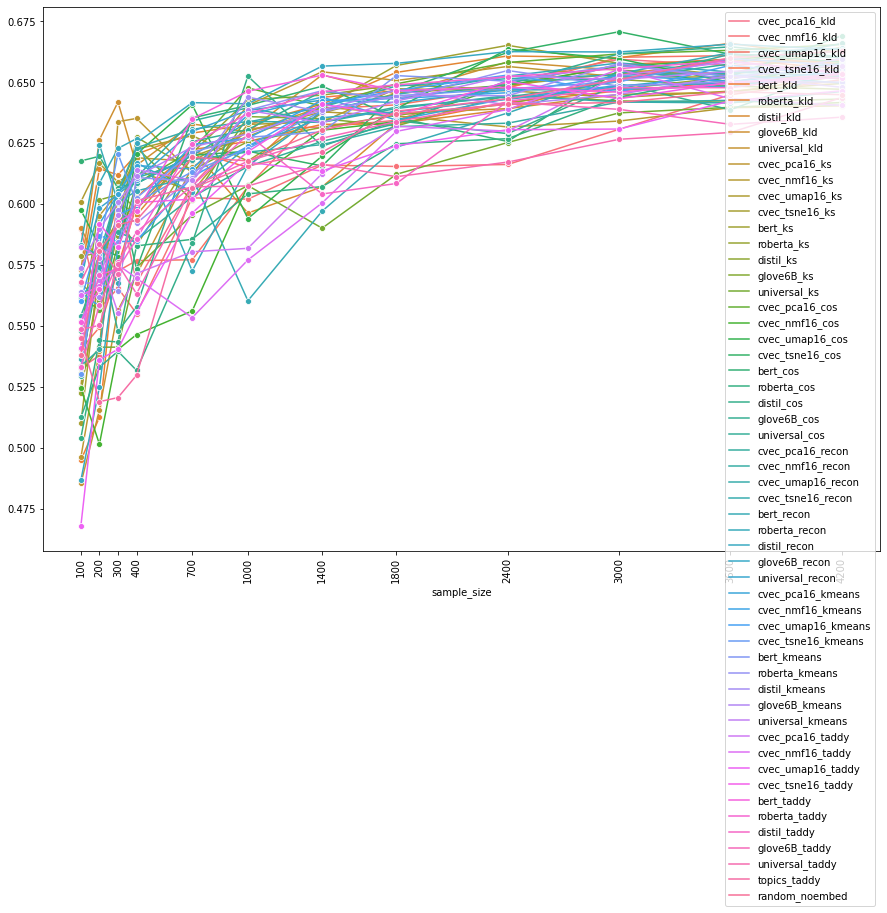

In [14]:
plt.figure(figsize=(15,10))
sns.lineplot(data=auc_df, marker='o', dashes=False).set(xticks=samps)
plt.legend()
plt.xticks(rotation=90)
plt.show()

### Sample size versus AUC-ROC score (comparison of embeddings)

In [15]:
len(auc_df.columns)

56

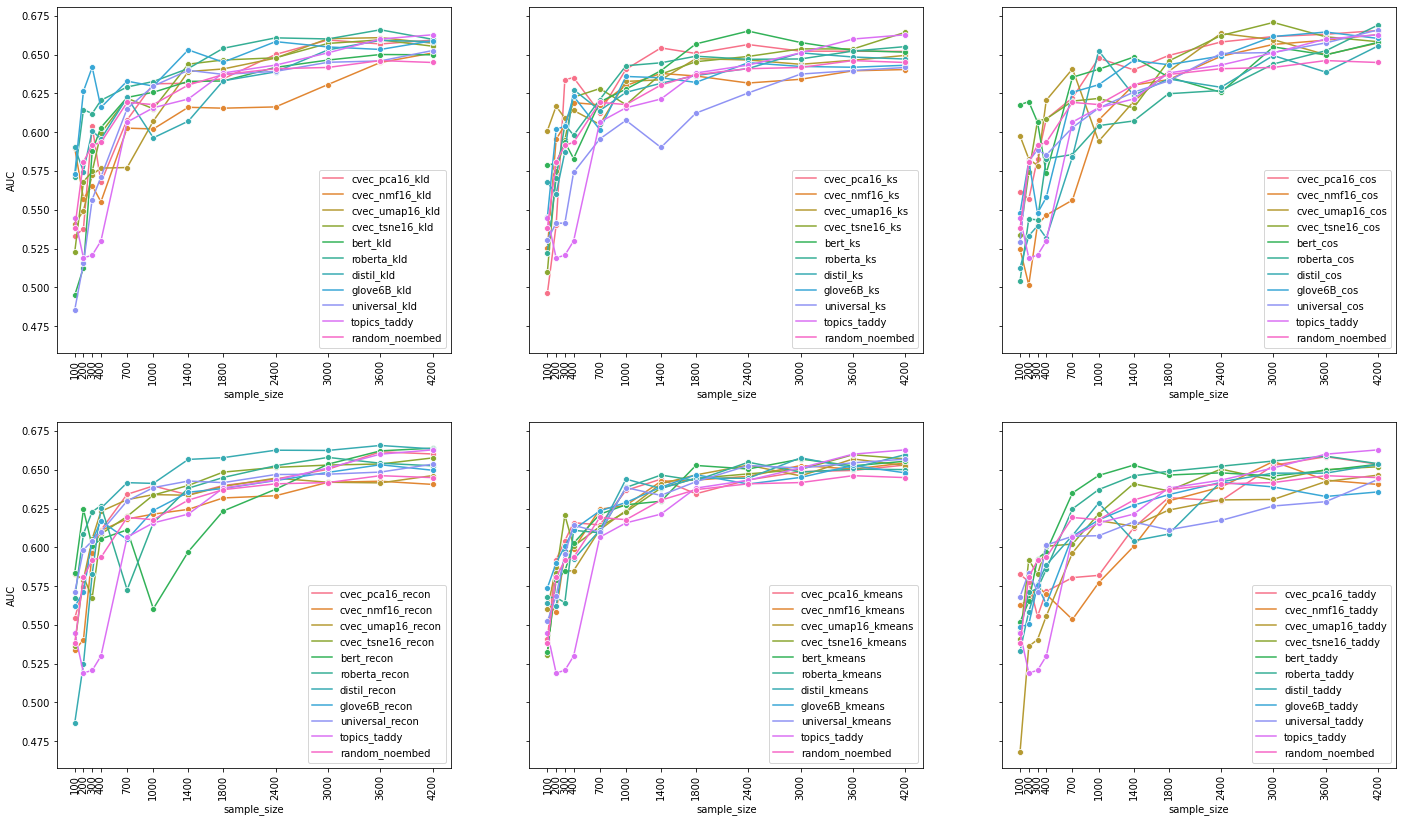

In [16]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(24,14), sharey=True)

lst = [[i for i in range(len(auc_df.columns)) if '_kld' in auc_df.columns[i]] + [54, 55],
       [i for i in range(len(auc_df.columns)) if '_ks' in auc_df.columns[i]] + [54, 55],
       [i for i in range(len(auc_df.columns)) if '_cos' in auc_df.columns[i]] + [54, 55],
       [i for i in range(len(auc_df.columns)) if '_recon' in auc_df.columns[i]] + [54, 55],
       [i for i in range(len(auc_df.columns)) if '_kmeans' in auc_df.columns[i]]+ [54, 55],
       [i for i in range(len(auc_df.columns)) if '_taddy' in auc_df.columns[i]] + [55]]
k=0
for i in range(2):
  for j in range(3):
    g = sns.lineplot(data=auc_df.iloc[:, lst[k]], marker='o', dashes=False, ax=axes[i,j])
    g.set(xticks=samps)
    g.set_xticklabels(samps, rotation=90)
    g.set(ylabel='AUC')
    k+=1
plt.show()

### Sample size versus AUC-ROC score (comparison of selection methods)

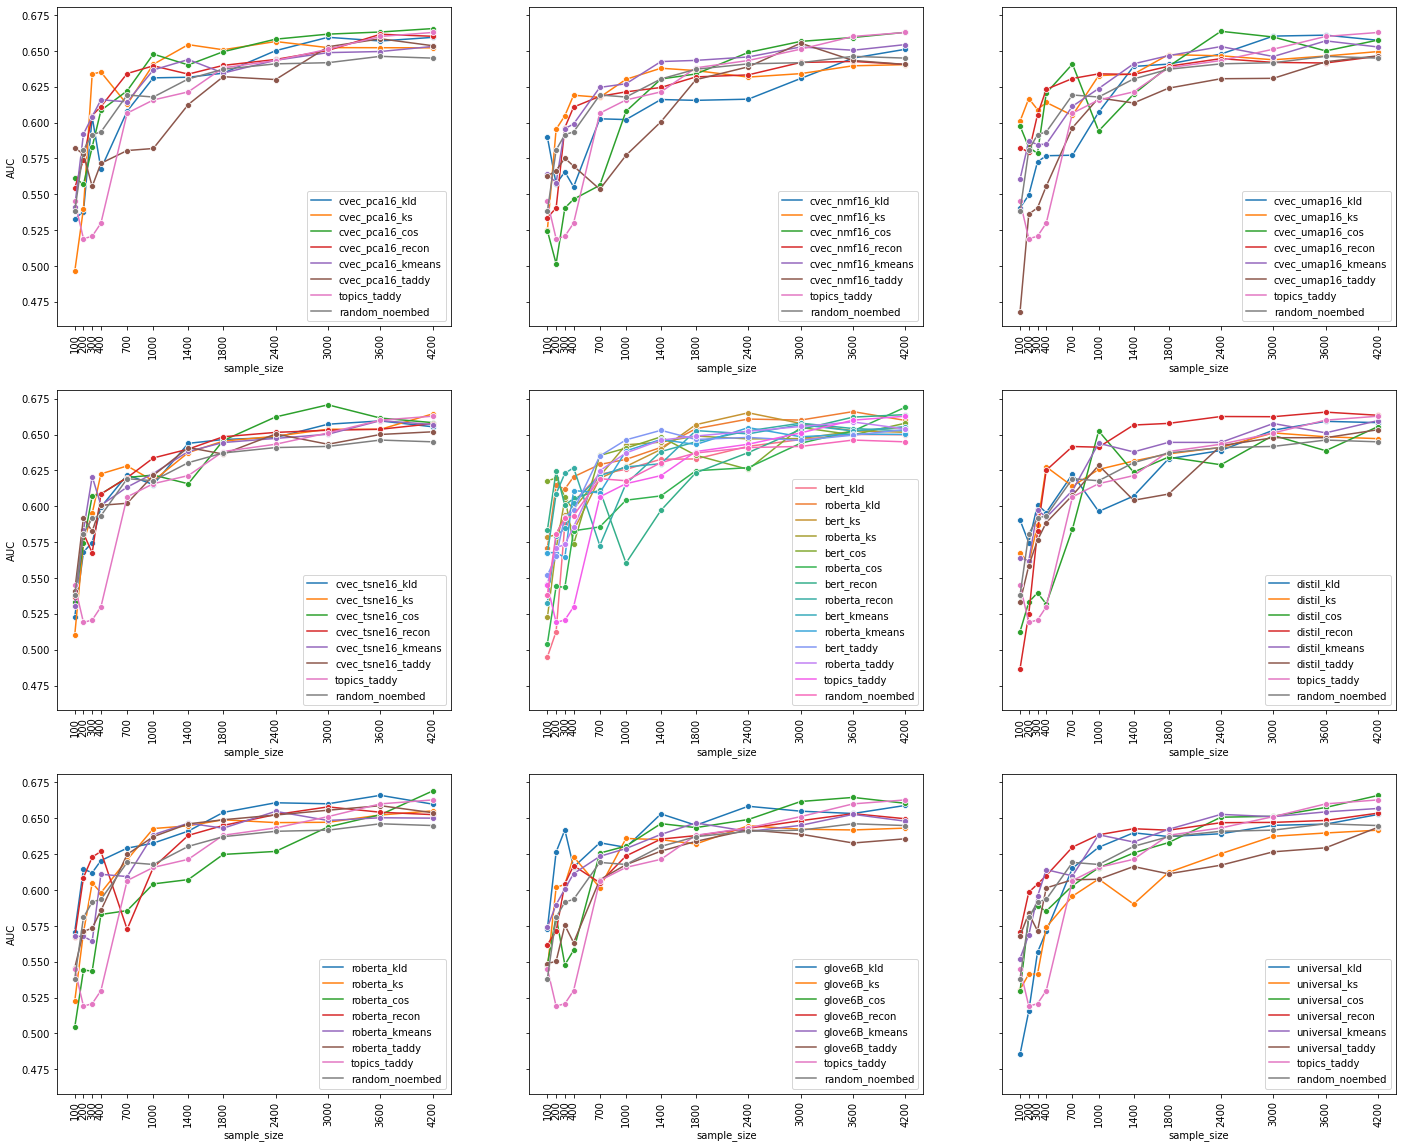

In [17]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(24,20), sharey=True)

lst = [[i for i in range(len(auc_df.columns)) if 'cvec_pca16' in auc_df.columns[i]] + [54, 55],
       [i for i in range(len(auc_df.columns)) if 'cvec_nmf16' in auc_df.columns[i]] + [54, 55],
       [i for i in range(len(auc_df.columns)) if 'cvec_umap16' in auc_df.columns[i]] + [54, 55],
       [i for i in range(len(auc_df.columns)) if 'cvec_tsne16' in auc_df.columns[i]] + [54, 55],
       [i for i in range(len(auc_df.columns)) if 'bert' in auc_df.columns[i]]+ [54, 55],
       [i for i in range(len(auc_df.columns)) if 'distil' in auc_df.columns[i]]+ [54, 55],
       [i for i in range(len(auc_df.columns)) if 'roberta' in auc_df.columns[i]]+ [54, 55],
       [i for i in range(len(auc_df.columns)) if 'glove6B' in auc_df.columns[i]]+ [54, 55],
       [i for i in range(len(auc_df.columns)) if 'universal' in auc_df.columns[i]]+ [54, 55]]
       
k=0
for i in range(3):
  for j in range(3):
    g = sns.lineplot(data=auc_df.iloc[:, lst[k]], marker='o', dashes=False, ax=axes[i,j])
    g.set(xticks=samps)
    g.set_xticklabels(samps, rotation=90)
    g.set(ylabel='AUC')
    k+=1
plt.show()

### Summarized performance of subset selection methods

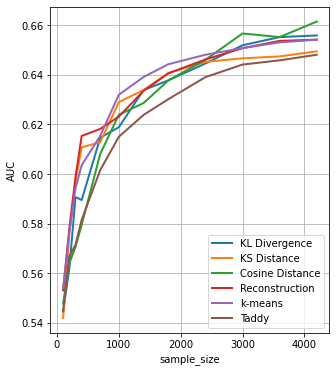

In [25]:
lst = [[i for i in range(len(auc_df.columns)) if '_kld' in auc_df.columns[i]],
       [i for i in range(len(auc_df.columns)) if '_ks' in auc_df.columns[i]],
       [i for i in range(len(auc_df.columns)) if '_cos' in auc_df.columns[i]],
       [i for i in range(len(auc_df.columns)) if '_recon' in auc_df.columns[i]],
       [i for i in range(len(auc_df.columns)) if '_kmeans' in auc_df.columns[i]],
       [i for i in range(len(auc_df.columns)) if '_taddy' in auc_df.columns[i] and 'topics' not in auc_df.columns[i]]]
labels = ['KL Divergence', 'KS Distance', 'Cosine Distance', 'Reconstruction', 'k-means', 'Taddy']
plt.figure(figsize=(5,6))
plt.grid()
for k in range(6):
  plt.plot(auc_df.iloc[:, lst[k]].mean(axis=1), label=labels[k], linewidth=2)
plt.ylabel('AUC')
plt.xlabel('sample_size')
plt.legend()
plt.show()

### Summarized performance of documents representations

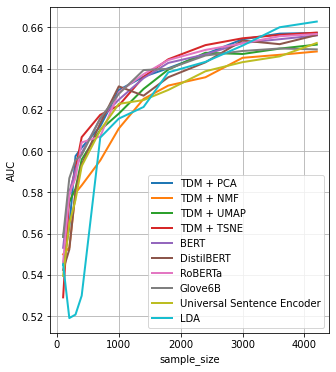

In [24]:
lst = [[i for i in range(len(auc_df.columns)) if 'cvec_pca16' in auc_df.columns[i]],
       [i for i in range(len(auc_df.columns)) if 'cvec_nmf16' in auc_df.columns[i]],
       [i for i in range(len(auc_df.columns)) if 'cvec_umap16' in auc_df.columns[i]],
       [i for i in range(len(auc_df.columns)) if 'cvec_tsne16' in auc_df.columns[i]],
       [i for i in range(len(auc_df.columns)) if 'bert' in auc_df.columns[i]],
       [i for i in range(len(auc_df.columns)) if 'distil' in auc_df.columns[i]],
       [i for i in range(len(auc_df.columns)) if 'roberta' in auc_df.columns[i]],
       [i for i in range(len(auc_df.columns)) if 'glove6B' in auc_df.columns[i]],
       [i for i in range(len(auc_df.columns)) if 'universal' in auc_df.columns[i]]]
labels = ['TDM + PCA', 'TDM + NMF', 'TDM + UMAP', 'TDM + TSNE', 'BERT', 'DistilBERT', 'RoBERTa', 'Glove6B', 'Universal Sentence Encoder', 'LDA']
plt.figure(figsize=(5,6))
plt.grid()
for k in range(9):
  plt.plot(auc_df.iloc[:, lst[k]].mean(axis=1), label=labels[k], linewidth=2)
plt.plot(auc_df['topics_taddy'], label=labels[k+1], linewidth=2)
plt.ylabel('AUC')
plt.xlabel('sample_size')
plt.legend()
plt.show()

### Top performers

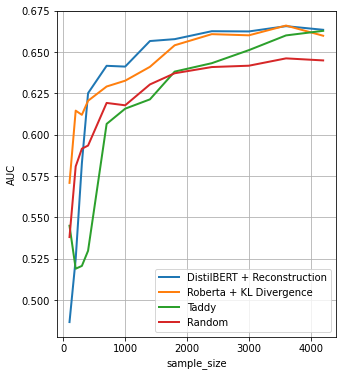

In [20]:
temp_df = auc_df[['distil_recon', 'roberta_kld', 'topics_taddy', 'random_noembed']]
temp_df.columns=['DistilBERT + Reconstruction', 'Roberta + KL Divergence', 'Taddy', 'Random']
temp_df.plot(figsize=(5,6), linewidth=2, grid=True)
plt.ylabel('AUC')
plt.show()

### Timing the methods

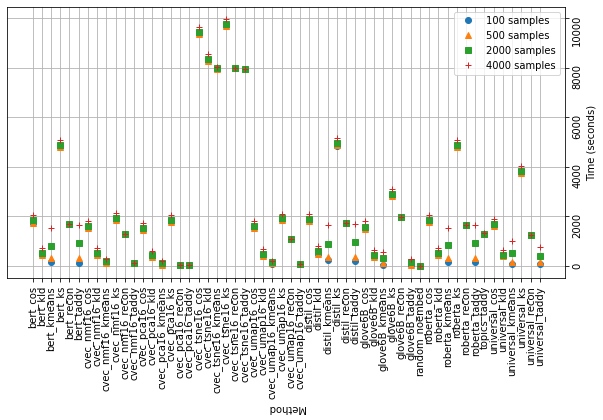

In [21]:
time_df = pd.read_csv('time_df.csv', index_col=0)
ax=time_df.iloc[0].plot(style='o', rot=90, figsize=(10,5), label='100 samples')
time_df.iloc[1].plot(style='^', ax=ax, rot=90, label='500 samples')
time_df.iloc[2].plot(style='s', ax=ax, rot=90, label='2000 samples')
time_df.iloc[3].plot(style='+', ax=ax, rot=90, label='4000 samples')
ax.grid()
ax.set_xticks(range(len(time_df.columns)))
ax.set_xticklabels(time_df.columns);
ax.set_yticklabels(labels=[0,0,2000,4000,6000,8000,10000], rotation=90)
ax.yaxis.tick_right()
plt.xlabel('Method', rotation=180)
plt.ylabel('Time (seconds)')
ax.yaxis.set_label_position("right")
plt.legend()
plt.show()

### Common observations per thousand

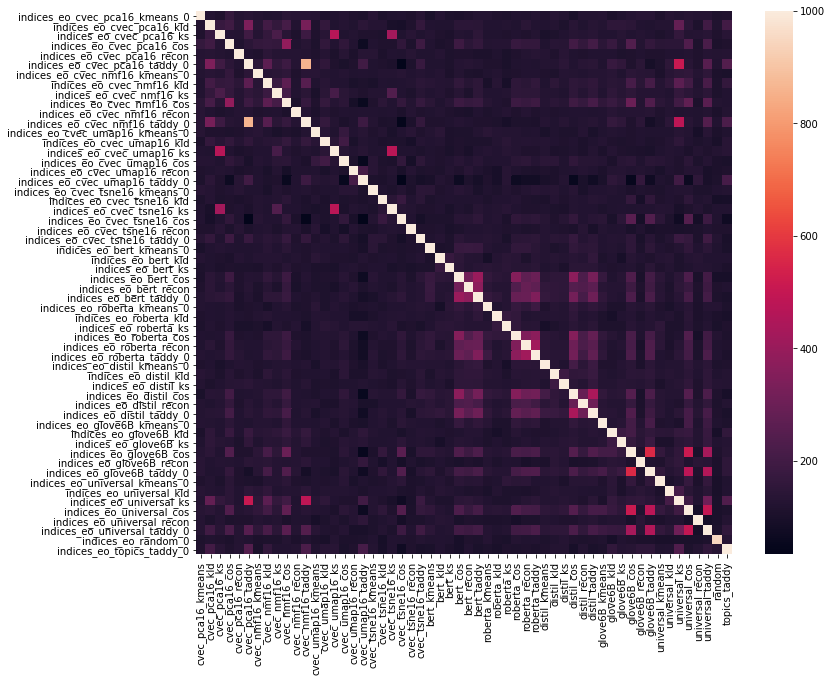

In [22]:
df = pd.read_csv('matrix_of_commons.csv', index_col=0)
df.columns = [x.replace('indices_eo_', '') for x in df.columns]
df.columns = [x.replace('_0', '') for x in df.columns]

fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(df, annot=False, xticklabels=True, yticklabels=True, ax=ax)